In [28]:
import warnings
warnings.filterwarnings("ignore")

## Classifier

https://www.coursera.org/lecture/machine-learning-classification-algorithms/what-does-a-classifier-actually-do-8dkun

Import the following libraries: pandas, numpy, matplotlib.pyplot, seaborn 

In [29]:
# %% module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In the attached csv file there are measurements (features) were done on malignant tissues of patients (observations) with lung cancer.
The first column (measurement0) is the severity of the illness (the higher value, the illness is more advanced). measurement1 ... measurementsN are different measurements were done on the tissues.
Each raw represents a patient, from patient0 ... patientN.

## Read file
Read the file named assignment_AI.csv in the folder as Pandas dataframe df

In [30]:
# use pandas library to read.csv file of features and stor in a dataframe object
df = pd.read_csv(r'assignment_AI.csv', parse_dates = True)

Save the patient column in patient_Num dataframe

In [31]:
# saving patient number for later. 
patient_Num = df[['patient']].copy()

Omit the patient column from df

In [32]:
# Omission of patient number, not helpful with prediction
df.drop('patient', axis=1, inplace=True)

In [33]:
Columens_list = df.columns

## Data Farme Scaling

Watch "Data Normalization in Python" from the next link:
https://www.coursera.org/lecture/data-analysis-with-python/data-normalization-in-python-pqNBS
and then import preprocessing from sklearn
and use MinMaxScaler() to scal your DataFrame 

Import preprocessing from sklearn
and use MinMaxScaler() to scal your DataFrame  

In [34]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [35]:
s_df = min_max_scaler.fit_transform(df)
s_df = pd.DataFrame(s_df, columns = Columens_list)

### The scaled dataset

Take a look at the normalized data

In [36]:
s_df.head()

measurement0  measurement1  measurement2  measurement3  measurement4  \
0      0.000000      0.028041      0.235032      0.190861      0.338310   
1      0.197466      0.253336      0.227616      0.108912      0.577463   
2      0.199106      0.201702      0.433657      0.260725      0.728433   
3      0.200000      0.483852      0.387810      0.350755      0.532414   
4      0.209985      0.447689      0.341963      0.055612      0.388974   

   measurement5  measurement6  measurement7  measurement8  measurement9  ...  \
0      0.727447      0.701783      0.890784      0.702477      0.696234  ...   
1      0.896207      0.839276      1.000000      0.755148      0.682445  ...   
2      0.915428      0.783901      0.971574      0.602059      0.757359  ...   
3      0.931445      0.689762      0.751496      0.675768      0.709361  ...   
4      0.934393      0.858185      0.931179      0.491495      0.745426  ...   

   measurement491  measurement492  measurement493  measurement494  \
0        0.360345        0.399723        0.208539        0.486116   
1        0.237858        0.597087        0.346479        0.581563   
2        0.322718        0.478849        0.219718        0.627731   
3        0.557641        0.061789        0.307835        0.558950   
4        0.263120        0.771151        0.064815        0.625093   

   measurement495  measurement496  measurement497  measurement498  \
0        0.431633        0.712634        0.212121        0.189999   
1        0.243793        0.771856        0.424242        0.584137   
2        0.965136        0.532290        0.346217        0.730685   
3        0.564116        0.368866        0.379060        0.368299   
4        0.365306        0.597434        0.196335        0.517804   

   measurement499  measurement500  
0        0.300451             0.0  
1        0.457505             0.0  
2        0.295452             0.0  
3        0.292647             0.0  
4        0.453481             0.0  

[5 rows x 501 columns]

Partition the patient to two groups with respect to the severity (measurement0) of the illness: low and high severity.

## Threshold seting / investigating the Severity Distribution 

Use describe() method on s_df.measurement0 to explor the Severity

In [37]:
s_df.measurement0.describe()

count    514.000000
mean       0.606062
std        0.106572
min        0.000000
25%        0.553279
50%        0.614009
75%        0.667660
max        1.000000
Name: measurement0, dtype: float64

Plot a histogram of the Severity Distribution

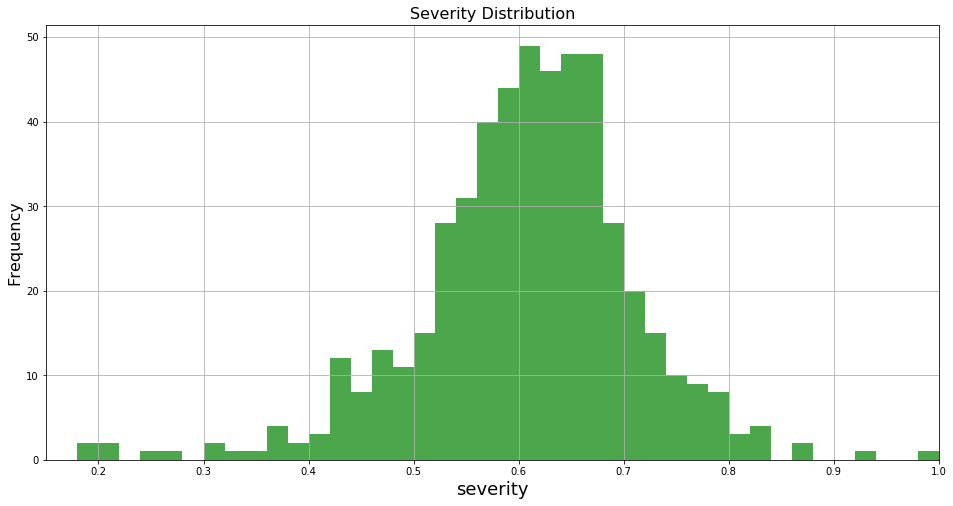

In [38]:
plt.figure(figsize=(16,8));
s_df['measurement0'].plot.hist(alpha=0.7, bins=50, facecolor='g')
plt.xlabel('severity', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.title('Severity Distribution', fontsize=16)
plt.xlim(0.15, 1)
plt.grid(True)
plt.show()

##### Copy s_df['measurement0'] in to s_df['severity']

In [39]:
s_df['severity'] = s_df['measurement0'].copy()

#### I would rather set the threshold as mean + one standard deviation. 
#### But it will create unbalanced dataset that make problems in the classification process. 
#### So I chose median threshold conditions, which would create balanced dataset.

Set the severity mode as the Threshold Between healthy and unhealthy as the median of the severity distribution
and print it to see the result

In [40]:
Threshold = s_df['severity'].median()
print ('Threshold:', Threshold)

Threshold: 0.6140089418777943


## Severity Level New Column 

In [41]:
s_df['severity'][s_df['measurement0']>=Threshold]=1
s_df['severity'][s_df['measurement0']<Threshold]=0

Look at the severity data

In [42]:
s_df[250:270].severity.tail(20)

250    0.0
251    0.0
252    0.0
253    0.0
254    1.0
255    1.0
256    1.0
257    1.0
258    1.0
259    1.0
260    1.0
261    1.0
262    1.0
263    1.0
264    1.0
265    1.0
266    1.0
267    1.0
268    1.0
269    1.0
Name: severity, dtype: float64

## Building a classifier

### Data prep
1. Save the severity featur in dataframe y_train
2. Drop the severity featur from s_df and copy it to x_train 
3. Drop the measurement0 from x_train

In [43]:
y_train = s_df[['severity']].copy()
x_train = s_df.drop('severity', axis=1).copy()
x_train.drop(['measurement0'], axis=1, inplace=True)

#### Check out the shape of the new datafame

In [44]:
x_train.shape, y_train.shape

((514, 500), (514, 1))

In [45]:
x_train.head()

measurement1  measurement2  measurement3  measurement4  measurement5  \
0      0.028041      0.235032      0.190861      0.338310      0.727447   
1      0.253336      0.227616      0.108912      0.577463      0.896207   
2      0.201702      0.433657      0.260725      0.728433      0.915428   
3      0.483852      0.387810      0.350755      0.532414      0.931445   
4      0.447689      0.341963      0.055612      0.388974      0.934393   

   measurement6  measurement7  measurement8  measurement9  measurement10  ...  \
0      0.701783      0.890784      0.702477      0.696234       0.632227  ...   
1      0.839276      1.000000      0.755148      0.682445       0.858095  ...   
2      0.783901      0.971574      0.602059      0.757359       0.962293  ...   
3      0.689762      0.751496      0.675768      0.709361       0.796254  ...   
4      0.858185      0.931179      0.491495      0.745426       0.947210  ...   

   measurement491  measurement492  measurement493  measurement494  \
0        0.360345        0.399723        0.208539        0.486116   
1        0.237858        0.597087        0.346479        0.581563   
2        0.322718        0.478849        0.219718        0.627731   
3        0.557641        0.061789        0.307835        0.558950   
4        0.263120        0.771151        0.064815        0.625093   

   measurement495  measurement496  measurement497  measurement498  \
0        0.431633        0.712634        0.212121        0.189999   
1        0.243793        0.771856        0.424242        0.584137   
2        0.965136        0.532290        0.346217        0.730685   
3        0.564116        0.368866        0.379060        0.368299   
4        0.365306        0.597434        0.196335        0.517804   

   measurement499  measurement500  
0        0.300451             0.0  
1        0.457505             0.0  
2        0.295452             0.0  
3        0.292647             0.0  
4        0.453481             0.0  

[5 rows x 500 columns]

In [46]:
#from sklearn import utils

In [47]:
x_train.head()

measurement1  measurement2  measurement3  measurement4  measurement5  \
0      0.028041      0.235032      0.190861      0.338310      0.727447   
1      0.253336      0.227616      0.108912      0.577463      0.896207   
2      0.201702      0.433657      0.260725      0.728433      0.915428   
3      0.483852      0.387810      0.350755      0.532414      0.931445   
4      0.447689      0.341963      0.055612      0.388974      0.934393   

   measurement6  measurement7  measurement8  measurement9  measurement10  ...  \
0      0.701783      0.890784      0.702477      0.696234       0.632227  ...   
1      0.839276      1.000000      0.755148      0.682445       0.858095  ...   
2      0.783901      0.971574      0.602059      0.757359       0.962293  ...   
3      0.689762      0.751496      0.675768      0.709361       0.796254  ...   
4      0.858185      0.931179      0.491495      0.745426       0.947210  ...   

   measurement491  measurement492  measurement493  measurement494  \
0        0.360345        0.399723        0.208539        0.486116   
1        0.237858        0.597087        0.346479        0.581563   
2        0.322718        0.478849        0.219718        0.627731   
3        0.557641        0.061789        0.307835        0.558950   
4        0.263120        0.771151        0.064815        0.625093   

   measurement495  measurement496  measurement497  measurement498  \
0        0.431633        0.712634        0.212121        0.189999   
1        0.243793        0.771856        0.424242        0.584137   
2        0.965136        0.532290        0.346217        0.730685   
3        0.564116        0.368866        0.379060        0.368299   
4        0.365306        0.597434        0.196335        0.517804   

   measurement499  measurement500  
0        0.300451             0.0  
1        0.457505             0.0  
2        0.295452             0.0  
3        0.292647             0.0  
4        0.453481             0.0  

[5 rows x 500 columns]

### train test split
See
https://www.coursera.org/lecture/ml-regression/training-test-split-qn2vj
Split the data into 20% test and 80% training using:
from sklearn.model_selection import train_test_split

In [48]:
# Split the data into 20% test and 80% training: 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

### Neuronal networks
### 1 Minute
https://www.youtube.com/watch?v=rEDzUT3ymw4&vl=en
### 5 Minutes
https://www.youtube.com/watch?v=bfmFfD2RIcg

In [49]:
# Create Classifier object
from xgboost.sklearn import XGBClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#clf = XGBClassifier()
clf = MLPClassifier()
#clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

In [50]:
# Train the model using the training sets
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [51]:
# Make predictions using the testing set
y_test_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

### What is confusion matrix?
https://www.youtube.com/watch?v=wpp3VfzgNcI
https://www.youtube.com/watch?v=bgyN3RO2ICo

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print ('confusion matrix:')
print (cm)

confusion matrix:
[[44  6]
 [13 40]]


https://www.youtube.com/watch?v=RYFViaaJxE8

In [54]:
# Accuray Score on train dataset
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print ('Accuracy_test:', accuracy)
accuracy = accuracy_score(y_train, y_train_pred)
print ('Accuracy_train:', accuracy)

Accuracy_test: 0.8155339805825242
Accuracy_train: 0.8856447688564477


In [55]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
MSLE = mean_squared_error(y_test, y_test_pred)
print ('Mean Squared Error_test:', MSLE)
MSLE = mean_squared_error(y_train, y_train_pred)
print ('Mean Squared Error_train:', MSLE)

Mean Squared Error_test: 0.18446601941747573
Mean Squared Error_train: 0.11435523114355231


In [ ]:
y_test_pred

### Run again with the file assignment_AI.csv
### This file contains more features why we are getting better results?
### Notice we're still in overfitting but the Mean Squared Error_test is the smallest 
### Try at home to run other models listed in the code

https://www.youtube.com/watch?v=4jRBRDbJemM&t=8s

## Get the features used in the model

In [56]:
from sklearn.metrics import roc_curve, auc

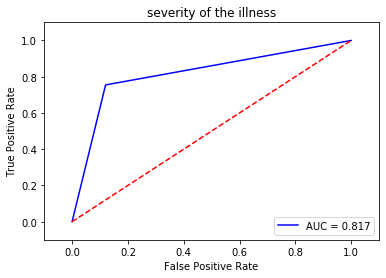

In [57]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.title('severity of the illness')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Until now we learned about supervised learning regression/classification
Other types of machine learning are:
1. Unsuprvised learning 
2. Reinforcement learning 

## Unsuprvised learning 

https://www.coursera.org/lecture/machine-learning-applied/unsupervised-learning-g3Qds

## Reinforcement learning

https://www.coursera.org/lecture/machine-learning-applied/reinforcement-learning-Ln7o0